In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Loading the dataset
df = pd.read_csv('B:\R\R Directories\Portfolio\Datasets\Spotify_Data\Spotify_Data.csv')

# Cleaning the data
df['release_date'] = pd.to_datetime(df['Release Date']) # Convert 'Release Date' to datetime, change column name
df = df.drop('Release Date', axis=1) # Drop the old 'Release Date' column for tidiness
df['explicit_track'] = df['Explicit Track'].astype('category') # Convert 'Explicit Track' to bool and change name

# Function to remove commas and convert to int
def safe_to_int(value):
    try:
        return int(value.replace(',', ''))
    except AttributeError:
        return None


columns_to_convert = df[['Spotify Streams', 'YouTube Views', 'Spotify Playlist Count',
                         'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
                         'Soundcloud Streams']]
for col in columns_to_convert:
    df[col] = df[col].apply(safe_to_int)

In [2]:
# Variables for defining colours
background_color = '#101010'
button_gray = '#B3B3B3'
spotify_green = '#1DB954'

In [3]:
# Make a count of the explicit count colum
explicit_counts = df['explicit_track'].value_counts()

# Map the counts to labels
labels = explicit_counts.index.map({1: 'Explicit', 0: 'Clean'})

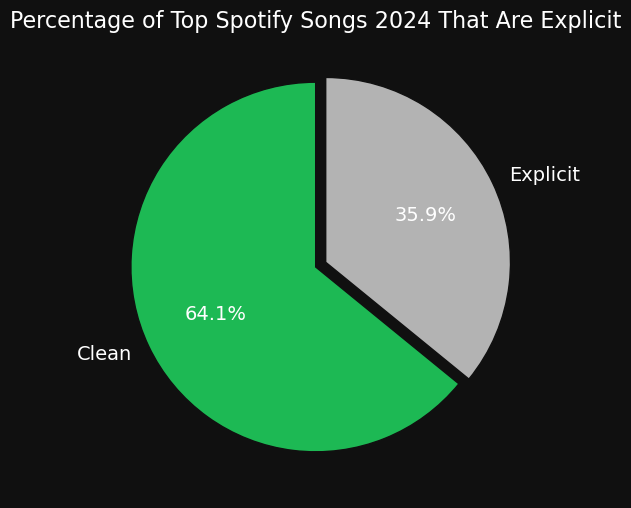

In [4]:
colors = [spotify_green, button_gray] # Easily change palette colour
explode = [0, 0.06] # Change the padding

# Set the theme to dark, trying to fit Spotify's colour scheme
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the pie chart
wedges, texts, autotexts = ax.pie(explicit_counts, labels=labels, autopct='%1.1f%%', startangle=90, 
                                  colors=colors, wedgeprops=dict(edgecolor=background_color), explode=explode)

plt.title('Percentage of Top Spotify Songs 2024 That Are Explicit', color='w', fontsize=(16))
for text in texts + autotexts:
    text.set_color('w')
    text.set_fontsize(14)

plt.show()

## Does a song being explicit affect its streams?

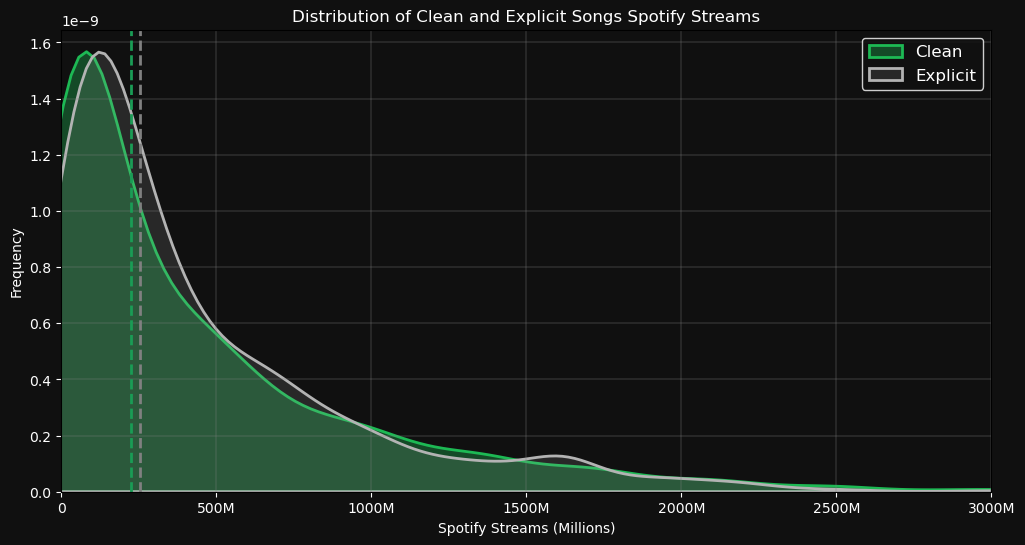

In [5]:
plt.figure(figsize=(12, 6))

# Use kdeplot as it makes customising each line separately far easier
sns.kdeplot(df[df['Explicit Track'] == 0]['Spotify Streams'], color=spotify_green, label='Clean', fill=True, alpha=0.35, linewidth=2)
sns.kdeplot(df[df['Explicit Track'] == 1]['Spotify Streams'], color=button_gray, label='Explicit', fill=True,alpha=0.15, linewidth=2)
plt.xlim(0, 3e9) # Set x-limit to avoid trailing data - akin to removing outliers
ax = plt.gca() # gca, and use alongside a lambda function and f-string to convert to Millions, except at 0 on x axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '0' if x == 0 else f'{int(x / 1_000_000)}M'))

# Add vertical lines at the Medians
ax.axvline(df[df['Explicit Track'] == 0]['Spotify Streams'].median(), color='#1A9C55', linestyle='--', lw=2)
ax.axvline(df[df['Explicit Track'] == 1]['Spotify Streams'].median(), color='#808080', linestyle='--', lw=2)

# Set colour scheme
fig = plt.gcf() # Get current figure
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='both', colors='w')  # Change color of numbers on axes



# Customising labels, title, grid, etc
ax.grid(color='gray', linewidth=0.3)
plt.title('Distribution of Clean and Explicit Songs Spotify Streams', color='w')
plt.xlabel('Spotify Streams (Millions)', color='w')
plt.ylabel('Frequency', color='w')
plt.legend(fontsize='large', facecolor=background_color, edgecolor='w', labelcolor='w')

plt.show()